# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ridho Kurniawan Utama
- **Email:** crtvee.email@gmail.com 
- **ID Dicoding:** llewxam

## Menentukan Pertanyaan Bisnis

- What is the most high-selling product?
- Rate of order cancelled and order delivered
- Geolocation of the highest consumer
- Most used Payment mode

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

Fase ini digunakan untuk mendefinisikan dataset yang akan digunakan dalam analisis, yaitu:

Brazilian E-Commerce Public Dataset by Olist

Dataset ini berisi berbagai informasi terkait transaksi e-commerce di Brasil, mencakup detail pelanggan, pesanan, pembayaran, produk, dan ulasan.

Sumber:
[Kaggle - Brazilian E-Commerce Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

In [3]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- Data tertulis dengan bahasa latin / portugis

### Assessing Data

Fase ini digunakan untuk memeriksa kualitas data, seperti:

1. Mendeteksi Data yang Hilang
    - Mengecek apakah ada nilai kosong atau null dalam dataset yang perlu ditangani.
2. Mencari Data Duplikat
    - Mengidentifikasi dan menghapus entri duplikat yang bisa mempengaruhi analisis.
3. Memeriksa Tipe Data
    - Mengevaluasi tipe data di setiap kolom untuk memastikan sesuai dengan yang diharapkan, seperti datetime, numeric, atau categorical.

In [4]:
def assessing_data():
    datasets = {
        'Customers': customers,
        'Geolocation': geolocation,
        'Order Items': order_items,
        'Order Payments': order_payments,
        'Order Reviews': order_reviews,
        'Orders': orders,
        'Products': products,
        'Sellers': sellers
    }

    for name, df in datasets.items():
        print(f"\n{name} Dataset: ")
        print(f"Shape: {df.shape}")
        print("Missing values:")
        print(df.isnull().sum())
        print("Data types:")
        print(df.dtypes)

assessing_data()


Customers Dataset: 
Shape: (99441, 5)
Missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Data types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Geolocation Dataset: 
Shape: (1000163, 5)
Missing values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Data types:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Order Items Dataset: 
Shape: (112650, 7)
Missing values:
order_id               0
order_item_id          0
product_id     

**Insight:**
- Berberapa Missing Value pada data product dataset
- Berberapa Missing Value pada order status dataset
- data Customer, Geolokasi, dan Seller lengkap

### Cleaning Data

Fase ini digunakan untuk pembersihan data seperti,
1. Mengubah kolom tanggal menjadi format datetime
2. Mengisi nilai kosong pada kolom 'order_delivered_customer_date' dengan 'Not delivered'
3. Menghapus duplikat dalam dataset geolocation: Remove duplicates in the geolocation dataset.

In [5]:
def clean_data():
    orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
    orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
    order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])
    
    orders['order_delivered_customer_date'].fillna('Not delivered', inplace=True)
    geolocation.drop_duplicates(inplace=True)

clean_data()

C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\4002980420.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_delivered_customer_date'].fillna('Not delivered', inplace=True)
C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\4002980420.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not delivered' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders['order_delivered_customer_d

## Exploratory Data Analysis (EDA)

Fungsi ini digunakan untuk melakukan analisis eksploratif dasar pada dataset, seperti:

1. Menganalisis Statistik Harga Produk
    - Menampilkan ringkasan statistik harga dari dataset order_items, termasuk nilai rata-rata, standar deviasi, nilai minimum, maksimum, dan persentil.

2. Memeriksa Distribusi Status Pesanan
    - Menghitung jumlah masing-masing status pesanan (seperti delivered, canceled, shipped) dalam dataset orders untuk memahami pola status pesanan.

3. Memeriksa Distribusi Jenis Pembayaran
    - Menghitung jumlah setiap metode pembayaran (seperti credit card, boleto, debit card) dalam dataset order_payments untuk melihat metode pembayaran yang paling sering digunakan.


### Explore ...

In [6]:
def eda_checking():
    print("\nBasic Statistics:")
    print("\nOrder Items Price Statistics:")
    print(order_items['price'].describe())
    
    print("\nOrder Status Distribution:")
    print(orders['order_status'].value_counts())
    
    print("\nPayment Types Distribution:")
    print(order_payments['payment_type'].value_counts())

eda_checking()


Basic Statistics:

Order Items Price Statistics:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Payment Types Distribution:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


**Insight:**
- Variance harga sangat tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Fase ini digunakan untuk menganalisis produk terlaris berdasarkan jumlah penjualan.

Langkah-langkah analisis : 
1. Mengelompokkan data berdasarkan product_id, lalu menghitung jumlah pesanan (order_item_id) dan total pendapatan (price).  
2. Menghubungkan data produk dengan kategori produk menggunakan dataset products.
3. Menerjemahkan kategori produk ke bahasa Inggris menggunakan product_category_name_translation.
4. Menampilkan 10 produk terlaris dalam bentuk bar chart dengan Sales Volume sebagai sumbu X dan kategori produk sebagai sumbu Y.
5. Mencetak daftar 10 produk terlaris beserta jumlah penjualan dan total pendapatan.


Output:

 - Visualisasi Top 10 produk terlaris berdasarkan jumlah penjualan.
 - Tabel yang menampilkan kategori produk, jumlah penjualan, dan total pendapatan.

In [7]:
def answer_question_1():
    product_sales = order_items.groupby('product_id').agg({
        'order_item_id': 'count',
        'price': 'sum'
    }).reset_index()
    
    product_sales = product_sales.merge(products[['product_id', 'product_category_name']], on='product_id')

    product_sales = product_sales.merge(product_category_name_translation, on='product_category_name', how='left')
    
    plt.figure(figsize=(12, 6))
    top_10 = product_sales.nlargest(10, 'order_item_id')
    sns.barplot(data=top_10, x='order_item_id', y='product_category_name_english', palette='viridis')
    plt.title('Top 10 Products by Sales Volume')
    plt.xlabel('Sales Volume')
    plt.ylabel('Product Category')
    plt.show()
    
    print(top_10[['product_category_name_english', 'order_item_id', 'price']])
    return top_10

### Pertanyaan 2:

Fase ini digunakan untuk menganalisis distribusi status pesanan dalam dataset.

Langkah-langkah analisis:
1. Menghitung jumlah pesanan untuk setiap status dalam dataset orders.
2. Membuat pie chart (donut chart) untuk memvisualisasikan persentase masing-masing status pesanan.

- Menggunakan autopct='%1.1f%%' untuk menampilkan persentase.
- Menambahkan lingkaran putih di tengah agar berbentuk donut chart.
    
    3. Menampilkan legenda dengan kategori status pesanan.
    4. Mencetak jumlah pesanan untuk setiap status dalam bentuk tabel.

Output:

Visualisasi pie chart yang menunjukkan proporsi tiap status pesanan.
Tabel jumlah pesanan berdasarkan status

In [8]:
def answer_question_2():
    status_counts = orders['order_status'].value_counts()
    
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        status_counts, autopct='%1.1f%%', startangle=140, pctdistance=0.85
    )
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title('Order Status Distribution')
    plt.legend(wedges, status_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
    plt.tight_layout()
    plt.show()
    
    print("\nOrder Status Counts:")
    print(status_counts)
    return status_counts


### Pertanyaan 3:

Fase ini digunakan untuk menganalisis kota dengan jumlah pesanan terbanyak dalam dataset.

Langkah-langkah analisis:
1. Menggabungkan dataset orders dengan customers berdasarkan customer_id.
2. Mengelompokkan data berdasarkan kota (customer_city) dan provinsi (customer_state) untuk menghitung jumlah pesanan di setiap kota.
3. Membuat visualisasi menggunakan bar chart untuk menampilkan 10 kota dengan jumlah pesanan terbanyak.
4. Menampilkan tabel berisi 10 kota teratas dengan jumlah pesanan tertinggi.

Output:

- Grafik batang (bar chart) yang menunjukkan 10 kota dengan pesanan terbanyak.
- Tabel jumlah pesanan per kota berdasarkan data yang telah dihitung. 🚀

In [9]:
def answer_question_3():
    customer_orders = orders.merge(customers, on='customer_id')
    top_locations = customer_orders.groupby(['customer_city', 'customer_state'])\
        .size().reset_index(name='order_count')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_locations.nlargest(10, 'order_count'), 
                x='order_count', y='customer_city')
    plt.title('Top 10 Cities by Order Count')
    plt.show()
    
    print("\nTop 10 Cities by Order Count:")
    print(top_locations.nlargest(10, 'order_count'))
    return top_locations.nlargest(10, 'order_count')

### Pertanyaan 4:

Fase ini digunakan untuk menganalisis distribusi metode pembayaran dalam dataset.

Langkah-langkah analisis:
1. Menghitung jumlah transaksi berdasarkan metode pembayaran (payment_type).
2. Membuat visualisasi menggunakan bar chart untuk menampilkan distribusi metode pembayaran.
3. Menampilkan tabel dengan jumlah penggunaan setiap metode pembayaran.

Output:

- Grafik batang (bar chart) yang menunjukkan distribusi metode pembayaran yang digunakan pelanggan.
- Tabel jumlah transaksi per metode pembayaran. 🚀

In [10]:
def answer_question_4():
    payment_counts = order_payments['payment_type'].value_counts()
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=payment_counts.index, y=payment_counts.values)
    plt.title('Payment Methods Distribution')
    plt.xticks(rotation=45)
    plt.show()
    
    print("\nTop 10 Cities by Order Count:")
    print(payment_counts)
    return payment_counts

### Jawaban Setiap Pertanyaan : 

C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\1362725774.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='order_item_id', y='product_category_name_english', palette='viridis')


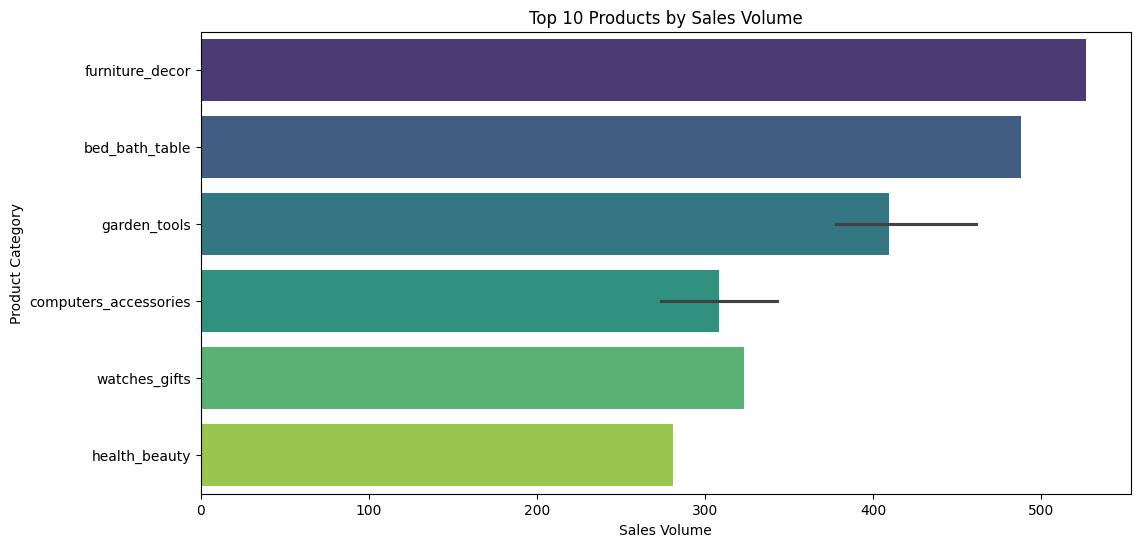

      product_category_name_english  order_item_id     price
22112               furniture_decor            527  37608.90
19742                bed_bath_table            488  43025.56
8613                   garden_tools            484  26577.22
7364                   garden_tools            392  21440.59
7079                   garden_tools            388  21056.80
10840                  garden_tools            373  20387.20
27039         computers_accessories            343  47214.51
10867                 watches_gifts            323  37683.42
2794                  health_beauty            281   6325.19
8051          computers_accessories            274  41082.60


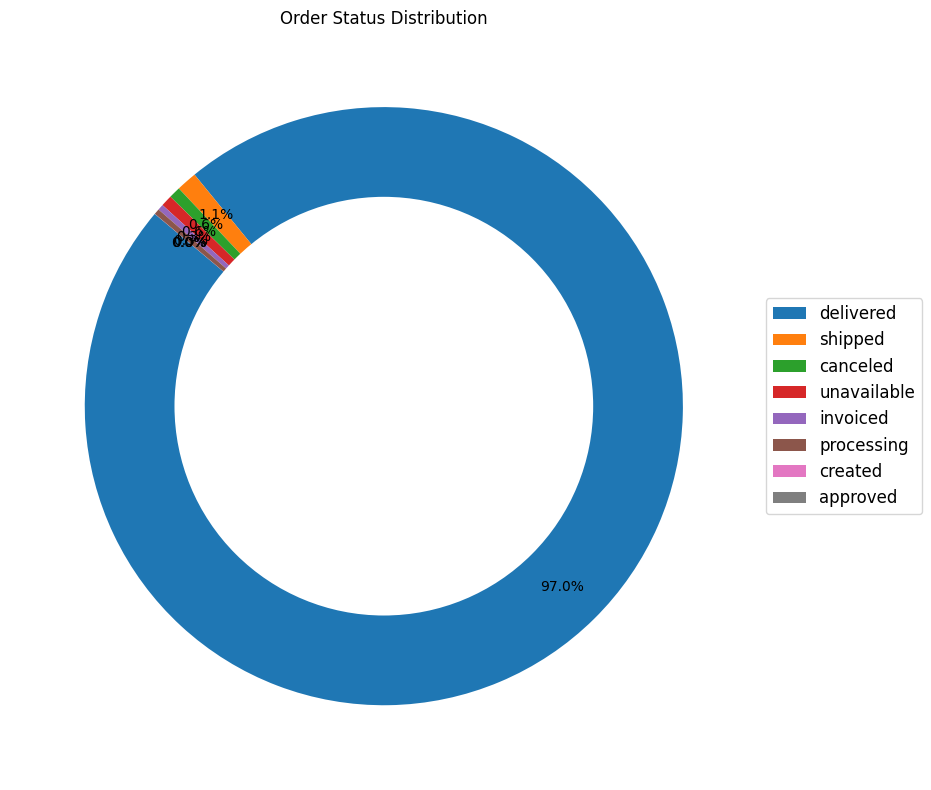


Order Status Counts:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


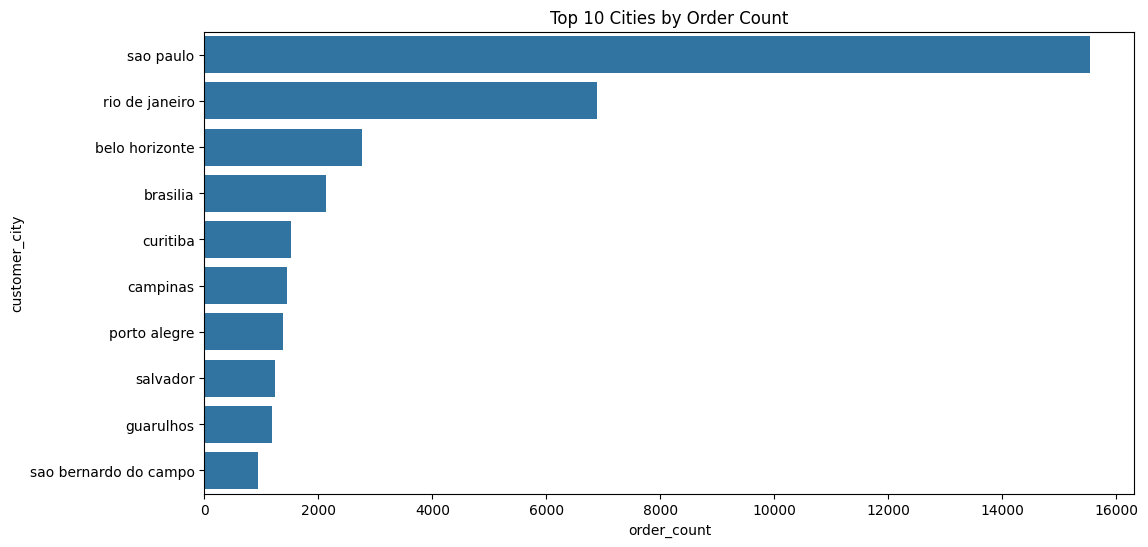


Top 10 Cities by Order Count:
              customer_city customer_state  order_count
3758              sao paulo             SP        15540
3281         rio de janeiro             RJ         6882
469          belo horizonte             MG         2773
587                brasilia             DF         2131
1187               curitiba             PR         1521
739                campinas             SP         1444
3080           porto alegre             RS         1379
3375               salvador             BA         1245
1587              guarulhos             SP         1189
3574  sao bernardo do campo             SP          938


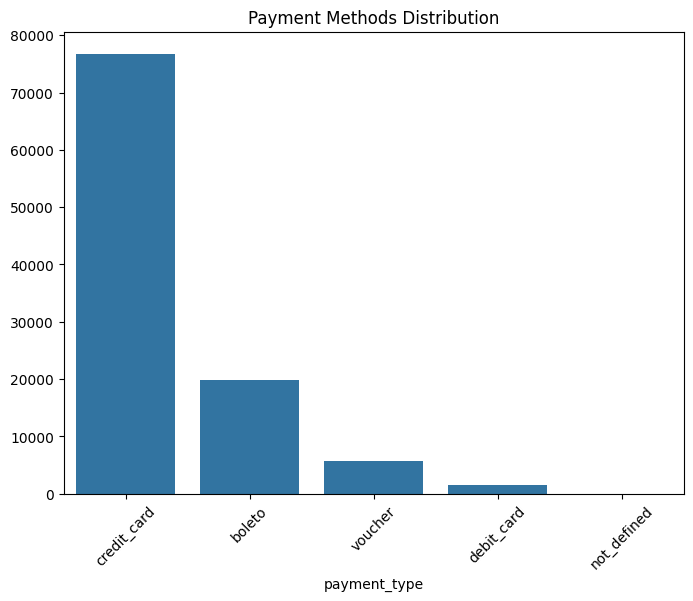


Top 10 Cities by Order Count:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [11]:
q1_results = answer_question_1()
q2_results = answer_question_2()
q3_results = answer_question_3()
q4_results = answer_question_4()

**Insight:**
- Furniture Dan Dekor termasuk sebagai High-Value Products
- Order diselesaikan lebih tinggi dari pada order dibatalkan atau ketidak-tersediaan
- Sao Paulo merupakan Kota Tertinggi dari pemesanan
- Kartu Kredit adalah metode pembayaran favorit

## Analisis Lanjutan (Opsional)

Fase ini digunakan untuk menganalisis pelanggan berdasarkan model RFM (Recency, Frequency, Monetary) guna memahami pola pembelian dan segmentasi pelanggan.

Langkah-langkah analisis:
1. Menentukan nilai Recency, Frequency, dan Monetary untuk setiap pelanggan:
    - Recency: Seberapa baru pelanggan melakukan pembelian terakhirnya.
    - Frequency: Seberapa sering pelanggan melakukan transaksi.
    - Monetary: Total uang yang telah dibelanjakan pelanggan.
2. Memberi skor pada masing-masing aspek (R, F, M) dengan 3 kategori: tinggi, menengah, dan rendah.

3. Menyusun segmen pelanggan berdasarkan kombinasi skor RFM (misalnya "Recent - High Frequency - High Spend").

Output:

- 3 grafik distribusi skor untuk Recency, Frequency, dan Monetary.
- Tabel segmentasi pelanggan berdasarkan kombinasi skor RFM.
- Ringkasan jumlah pelanggan di tiap segmen. 🚀

C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\722139611.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='R_Score', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\722139611.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='F_Score', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\722139611.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='M_Score', palette='viridis')


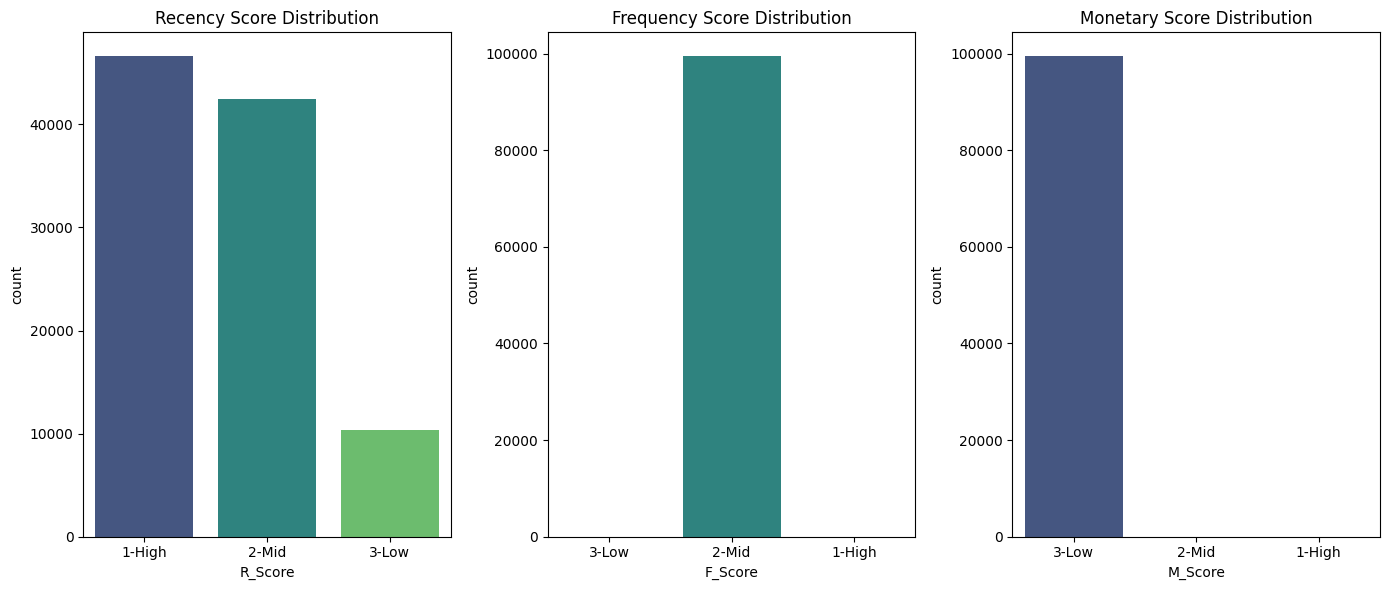


RFM Analysis Summary:
RFM_Score
Recent - Mid Frequency - Low Spend        46592
Mid-Recent - Mid Frequency - Low Spend    42487
Not Recent - Mid Frequency - Low Spend    10351
Recent - Mid Frequency - Mid Spend            4
Not Recent - Mid Frequency - Mid Spend        3
Name: count, dtype: int64


In [12]:
def rfm_analytics():
    latest_date = orders['order_purchase_timestamp'].max()
    
    order_values = order_payments.groupby('order_id')['payment_value'].sum().reset_index()
    orders_with_values = orders.merge(order_values, on='order_id')

    rfm = orders_with_values.groupby('customer_id').agg({
        'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'
    }).reset_index()
    
    rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

    rfm['R_Score'] = pd.cut(rfm['recency'], bins=3, labels=['1-High', '2-Mid', '3-Low'])
    rfm['F_Score'] = pd.cut(rfm['frequency'], bins=3, labels=['3-Low', '2-Mid', '1-High'])
    rfm['M_Score'] = pd.cut(rfm['monetary'], bins=3, labels=['3-Low', '2-Mid', '1-High'])

    def rfm_statement(row):
        recency_map = {'1-High': 'Recent', '2-Mid': 'Mid-Recent', '3-Low': 'Not Recent'}
        frequency_map = {'3-Low': 'Low Frequency', '2-Mid': 'Mid Frequency', '1-High': 'High Frequency'}
        monetary_map = {'3-Low': 'Low Spend', '2-Mid': 'Mid Spend', '1-High': 'High Spend'}
        
        return f"{recency_map[row['R_Score']]} - {frequency_map[row['F_Score']]} - {monetary_map[row['M_Score']]}"

    rfm['RFM_Score'] = rfm.apply(rfm_statement, axis=1)
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 3, 1)
    sns.countplot(data=rfm, x='R_Score', palette='viridis')
    plt.title('Recency Score Distribution')

    plt.subplot(1, 3, 2)
    sns.countplot(data=rfm, x='F_Score', palette='viridis')
    plt.title('Frequency Score Distribution')

    plt.subplot(1, 3, 3)
    sns.countplot(data=rfm, x='M_Score', palette='viridis')
    plt.title('Monetary Score Distribution')

    plt.tight_layout()
    plt.show()
    
    return rfm

rmfs = rfm_analytics()
if rmfs is not None:
    print("\nRFM Analysis Summary:")
    print(rmfs['RFM_Score'].value_counts().head())

### Geospatial Analysis : 

Fase ini digunakan untuk analisis geospasial dengan memetakan lokasi pelanggan berdasarkan kode pos dan koordinat geografis.

Langkah-langkah analisis geospasial:
1. Menggabungkan data pelanggan dengan data lokasi geospasial menggunakan kode pos pelanggan dan prefix kode pos geolocation.
2. Menampilkan peta menggunakan Folium dengan marker berbentuk lingkaran merah yang menunjukkan lokasi pelanggan berdasarkan koordinat latitude dan longitude.
3. Menyimpan peta dalam format HTML yang dapat dibuka di browser untuk melihat distribusi pelanggan.

Output:

- Peta distribusi pelanggan dengan marker untuk 1000 pelanggan pertama.
- File HTML yang menyimpan peta yang dapat diakses langsung. 🗺️

In [13]:
def geospatial_analysis():
    customer_locations = customers.merge(
        geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
        left_on='customer_zip_code_prefix',
        right_on='geolocation_zip_code_prefix'
    ).drop_duplicates()

    m = folium.Map(location=[-14.235, -51.925], zoom_start=4)
    
    for idx, row in customer_locations.head(1000).iterrows():
        folium.CircleMarker(
            location=[row['geolocation_lat'], row['geolocation_lng']],
            radius=3,
            popup=f"City: {row['customer_city']}",
            color='red',
            fill=True
        ).add_to(m)
    
    m.save('customer_distribution.html')
    
    return customer_locations

geo_results = geospatial_analysis()

### Clustering : 

Fase ini digunakan untuk clustering pelanggan berdasarkan dua faktor utama: frekuensi pembelian dan nilai pengeluaran.

Langkah-langkah clustering:
1. Menggabungkan data pesanan dengan pembayaran untuk merangkum informasi berdasarkan ID pelanggan.
2. Menghitung dua segmen pelanggan:
    - Segmen frekuensi: Berapa kali pelanggan melakukan pembelian, dibagi menjadi tiga kategori: Low, Medium, dan High.
    - Segmen pengeluaran: Berapa banyak yang dibelanjakan pelanggan, dibagi menjadi tiga kategori: Budget, Regular, dan Premium.
3. Menyatukan kedua segmen menjadi satu kolom baru yang disebut customer_segment, yang menggabungkan segmen frekuensi dan pengeluaran.
4. Visualisasi distribusi masing-masing segmen menggunakan countplot dengan dua plot:
    - Distribusi segmen frekuensi
    - Distribusi segmen pengeluaran

Output:

- Clustering pelanggan berdasarkan frekuensi dan pengeluaran.
- Ringkasan segmentasi ditampilkan dengan frekuensi segmentasi yang menunjukkan distribusi pelanggan dalam segmen-segmen tersebut.

C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\3686190037.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_summary, x='frequency_segment', palette='viridis')
C:\Users\kurni\AppData\Local\Temp\ipykernel_6084\3686190037.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_summary, x='spending_segment', palette='viridis')


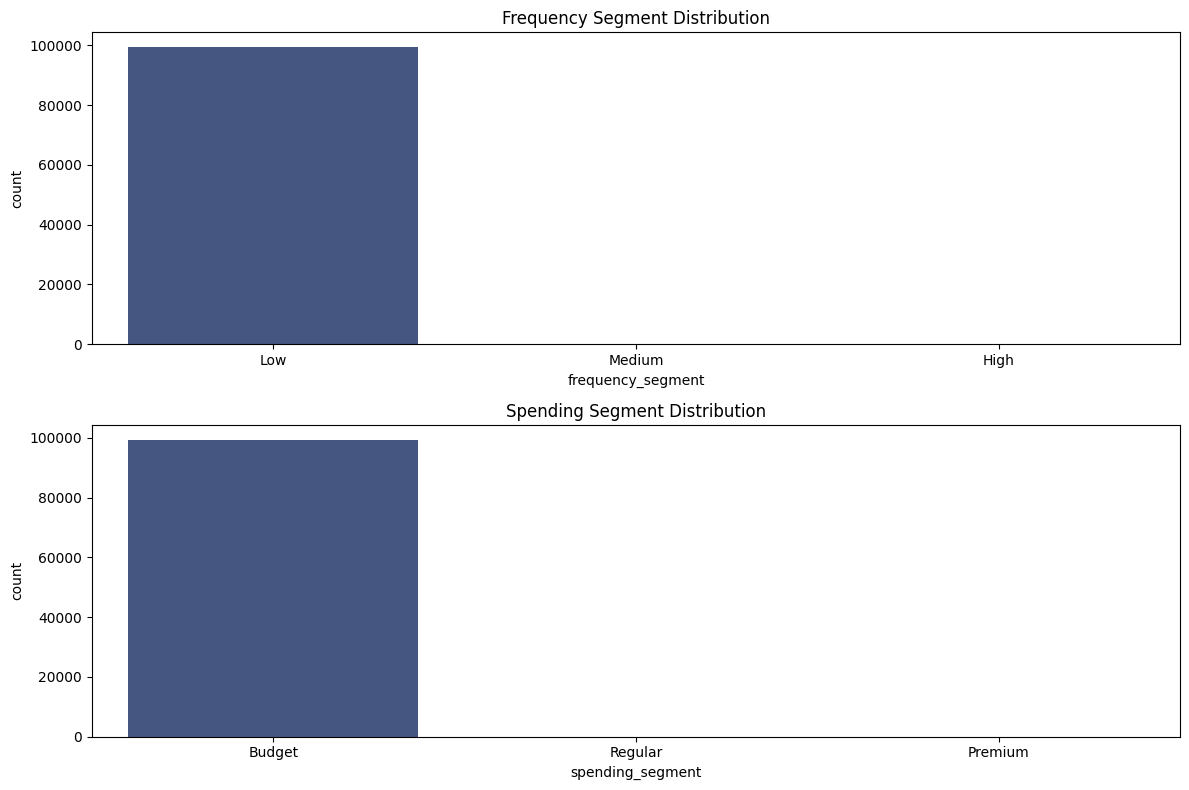


Customer Segment Summary:
customer_segment
Low_Budget       99401
Medium_Budget       25
Low_Regular          9
High_Budget          4
Low_Premium          1
Name: count, dtype: int64


In [14]:
def clustering():
    order_summary = orders.merge(order_payments, on='order_id')
    customer_summary = order_summary.groupby('customer_id').agg({
        'order_id': 'count',
        'payment_value': 'sum'
    }).reset_index()
    
    customer_summary['frequency_segment'] = pd.cut(
        customer_summary['order_id'],
        bins=3,
        labels=['Low', 'Medium', 'High']
    )
    
    customer_summary['spending_segment'] = pd.cut(
        customer_summary['payment_value'],
        bins=3,
        labels=['Budget', 'Regular', 'Premium']
    )
    
    customer_summary['customer_segment'] = customer_summary['frequency_segment'].astype(str) + '_' + customer_summary['spending_segment'].astype(str)
    
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    sns.countplot(data=customer_summary, x='frequency_segment', palette='viridis')
    plt.title('Frequency Segment Distribution')
    
    plt.subplot(2, 1, 2)
    sns.countplot(data=customer_summary, x='spending_segment', palette='viridis')
    plt.title('Spending Segment Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return customer_summary

cluster_result = clustering()
print("\nCustomer Segment Summary:")
print(cluster_result['customer_segment'].value_counts().head())


## Conclusion

- Conclution pertanyaan 1
    - Decor / Furniture adalah barang yang sering dibeli secara volume sales
- Conclution pertanyaan 2
    - 97% Semua barang sudah masuk status "Delivered", sedangkan "Canceled" hanya 0.6%
- Conclution pertanyaan 3
    - Sao Paulo merupakan daerah konsumen tertinggi di brazil
- Conclution pertanyaan 4
    - Kartu Kredit sebagai metode pembayaran tertinggi setelah boleto